In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



# Data Loading

In [2]:
df=pd.read_csv('mental_health_social_media_dataset.csv')

df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

# EDA

In [4]:
#make a new column age_group from age column    
def age_group(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age < 25:
        return '18-24'
    elif 25 <= age < 35:
        return '25-34'
    elif 35 <= age < 45:
        return '35-44'
    elif 45 <= age < 55:
        return '45-54'
    else:
        return '55+'
df['age_group'] = df['age'].apply(age_group)


## Categorical Distribution

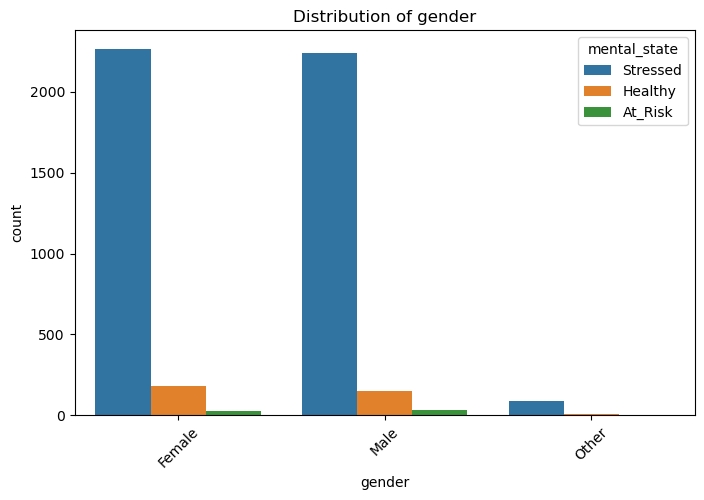

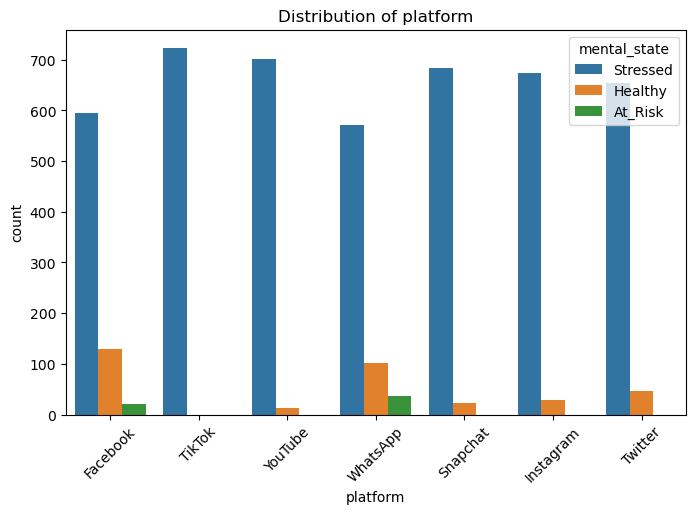

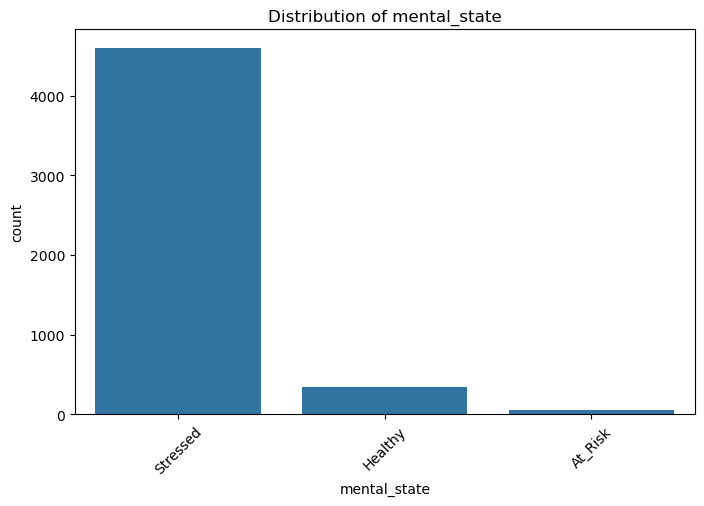

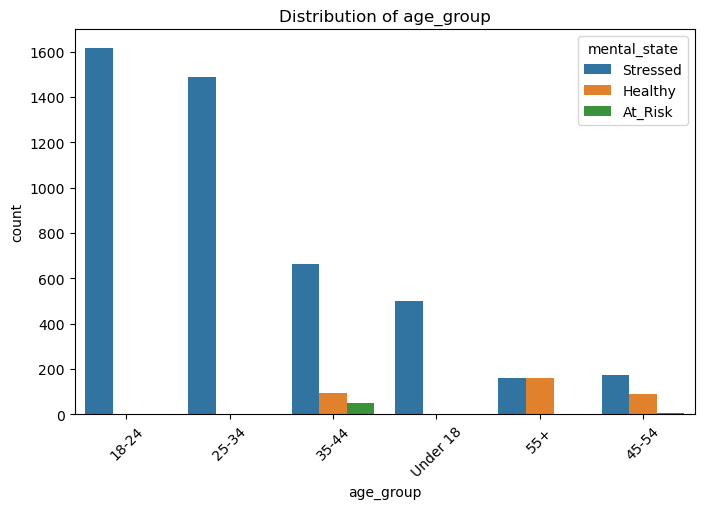

In [ ]:

categorical_vars = ['gender','platform', 'mental_state', 'age_group']
for var in categorical_vars:
    plt.figure(figsize=(8,5))
    if var != 'mental_state':
        sns.countplot(data=df, x=var, hue='mental_state', order=df[var].value_counts().index)
    else:
        sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

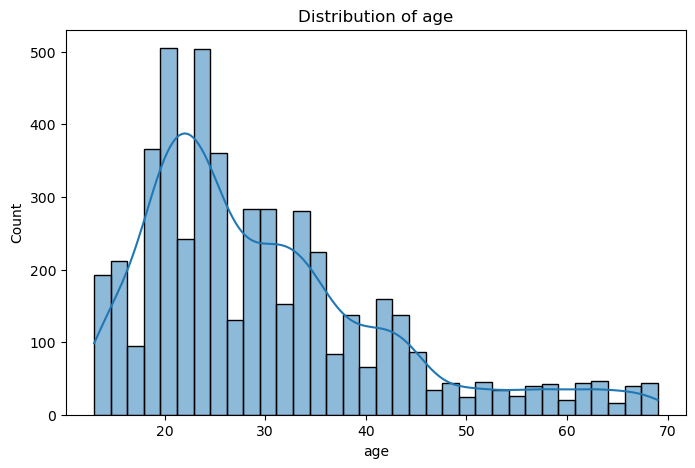

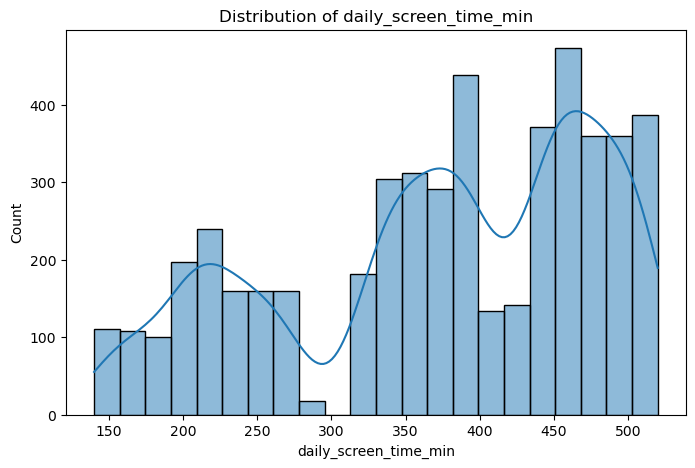

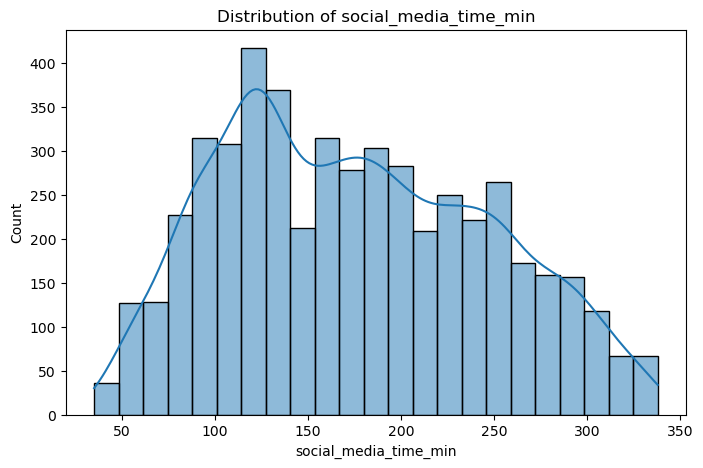

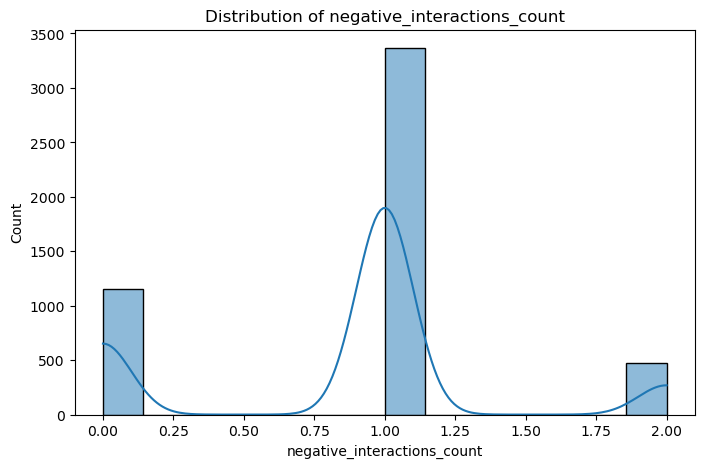

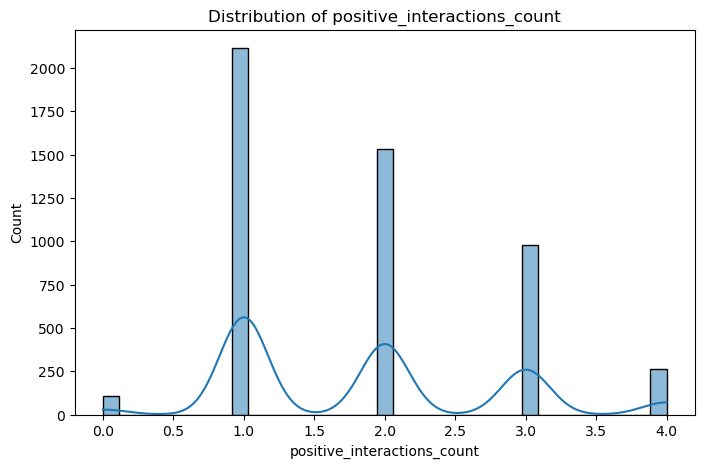

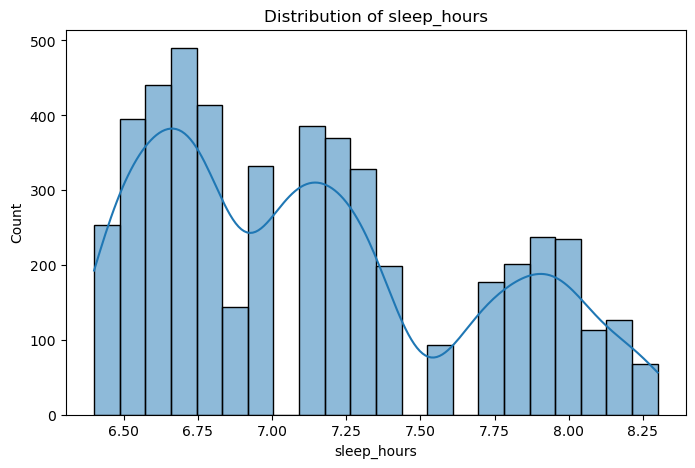

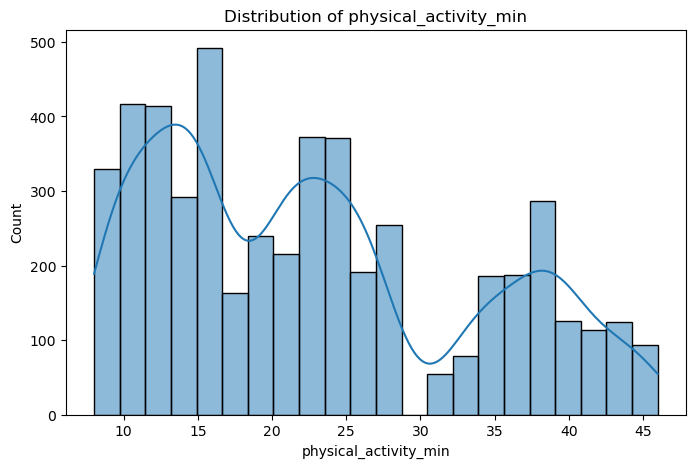

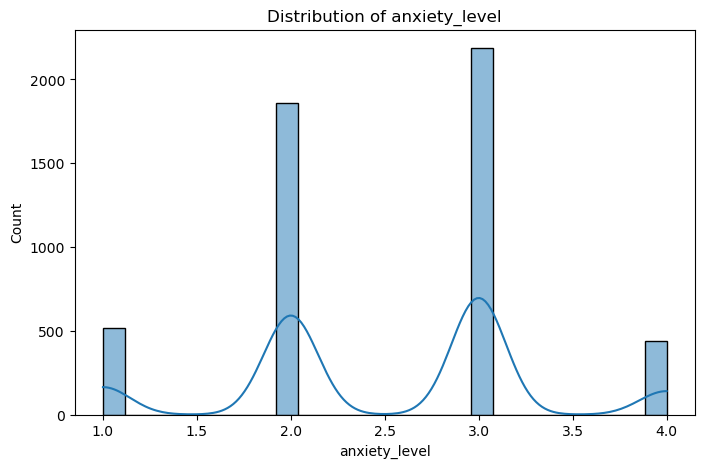

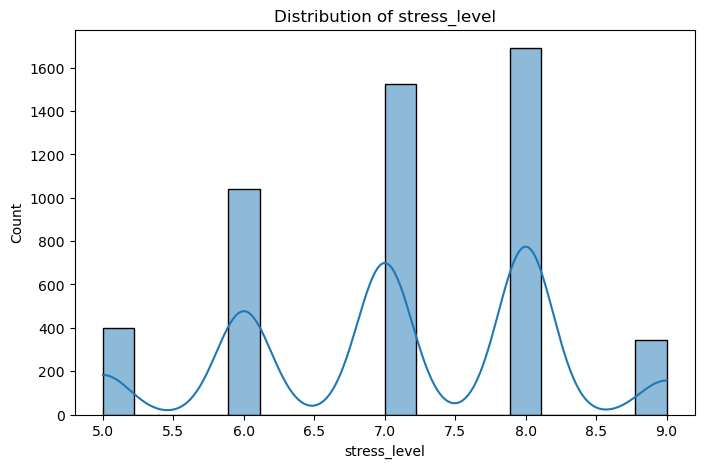

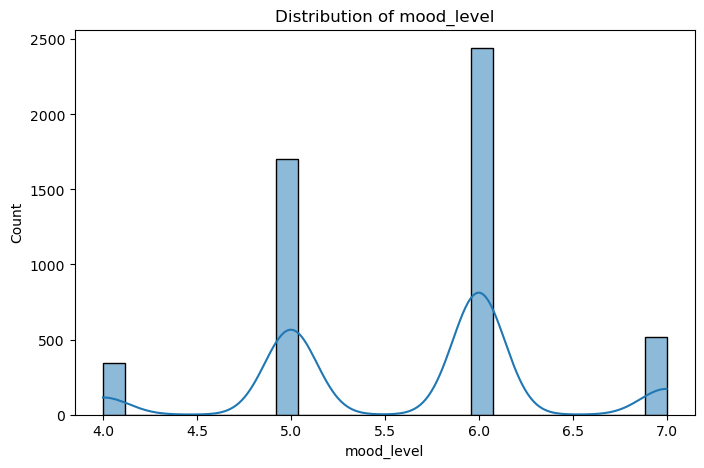

In [8]:
#distribution numeric variables
numeric_vars = ['age', 'daily_screen_time_min', 'social_media_time_min', 'negative_interactions_count', 'positive_interactions_count', 
                'sleep_hours', 'physical_activity_min', 'anxiety_level', 'stress_level', 'mood_level']
for var in numeric_vars:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()



## Platform Analysis    

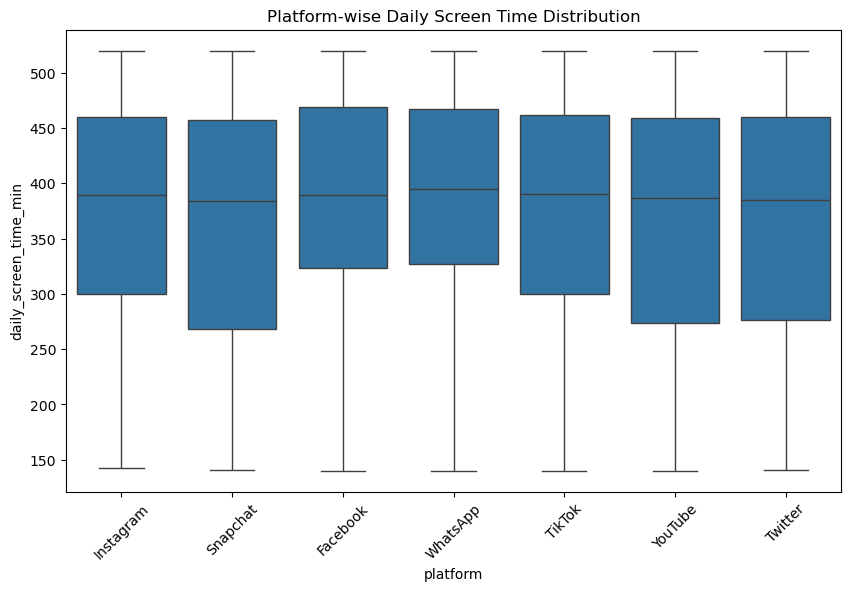

In [12]:
#platform wise daily screen time distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='platform', y='daily_screen_time_min')
plt.title('Platform-wise Daily Screen Time Distribution')
plt.xticks(rotation=45)
plt.show()

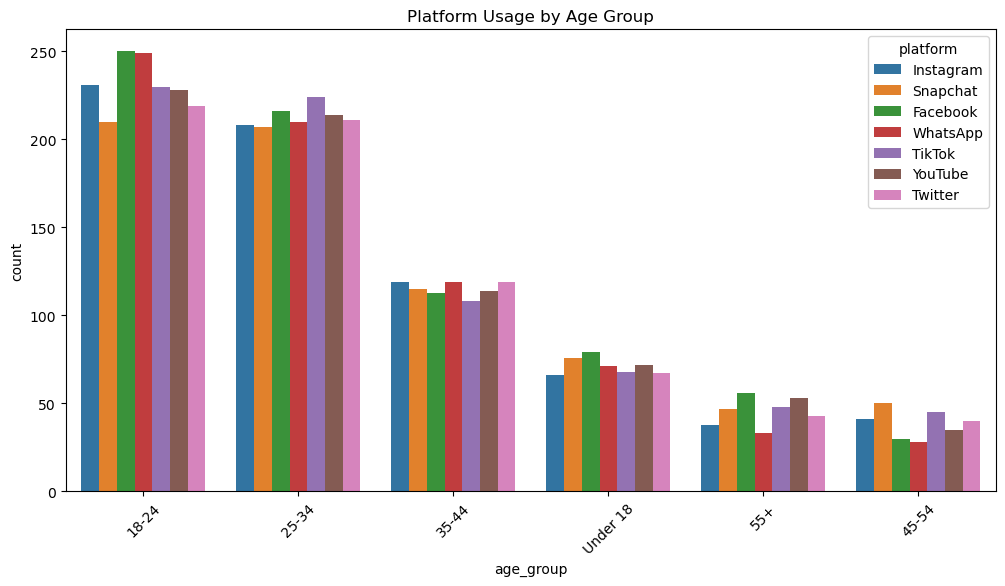

In [13]:
#platform usage by age group
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='age_group', hue='platform', order=df['age_group'].value_counts().index)
plt.title('Platform Usage by Age Group')
plt.xticks(rotation=45)
plt.show()

## Gender Analysis

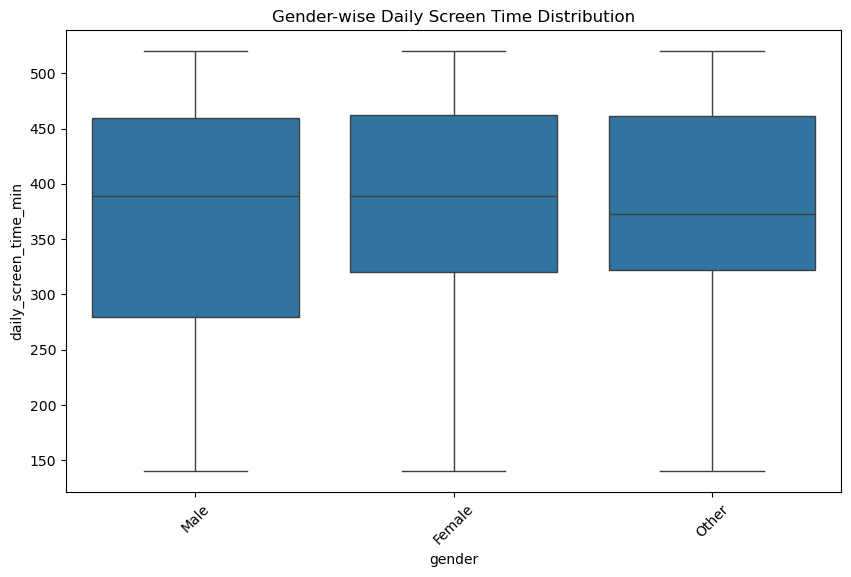

In [16]:
#gender wise daily screen time distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='gender', y='daily_screen_time_min')
plt.title('Gender-wise Daily Screen Time Distribution')
plt.xticks(rotation=45)
plt.show()

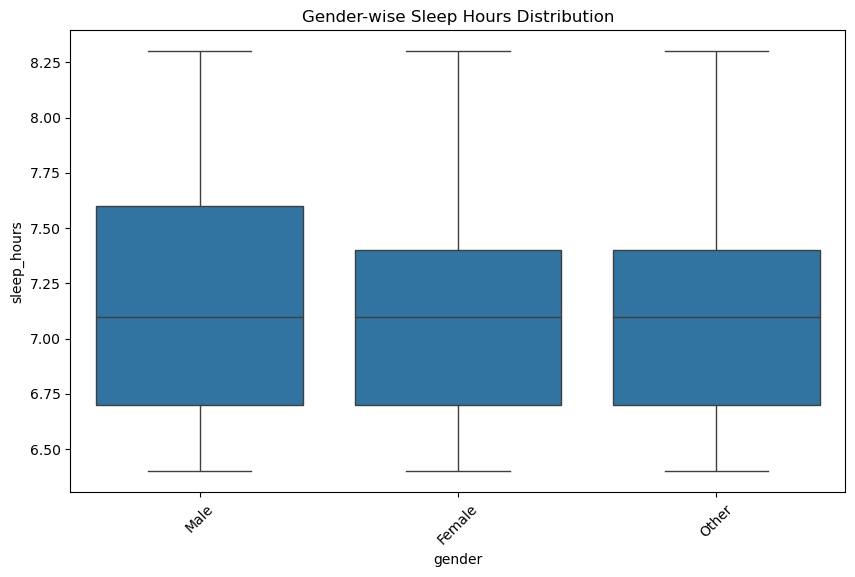

In [17]:
#gender wise sleep hours distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='gender', y='sleep_hours')
plt.title('Gender-wise Sleep Hours Distribution')
plt.xticks(rotation=45)
plt.show()

## Mental State Analysis

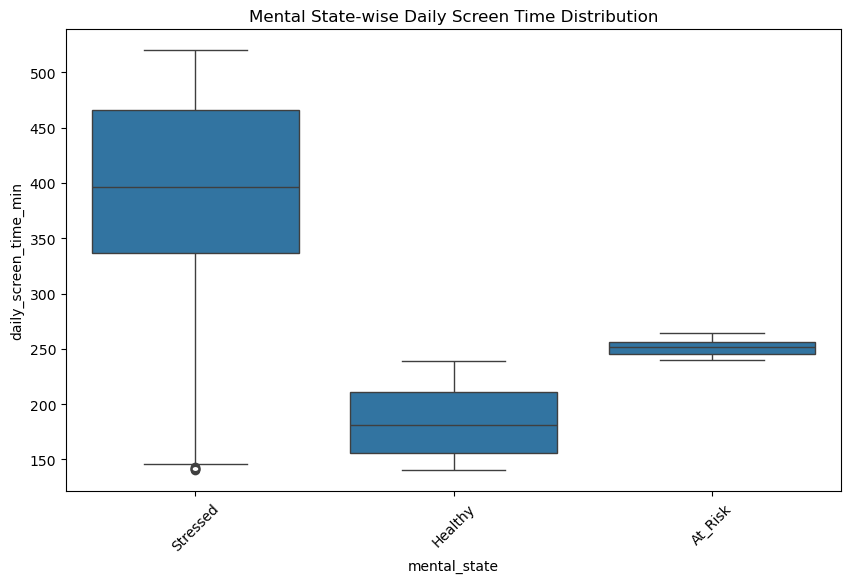

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='mental_state', y='daily_screen_time_min')
plt.title('Mental State-wise Daily Screen Time Distribution')
plt.xticks(rotation=45)
plt.show()

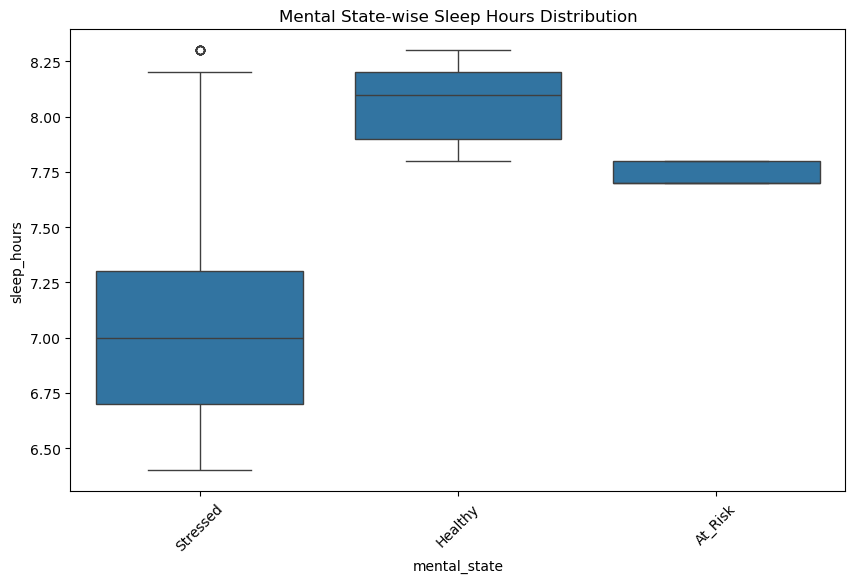

In [19]:
# mental state with sleep hours
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='mental_state', y='sleep_hours')
plt.title('Mental State-wise Sleep Hours Distribution')
plt.xticks(rotation=45)
plt.show()

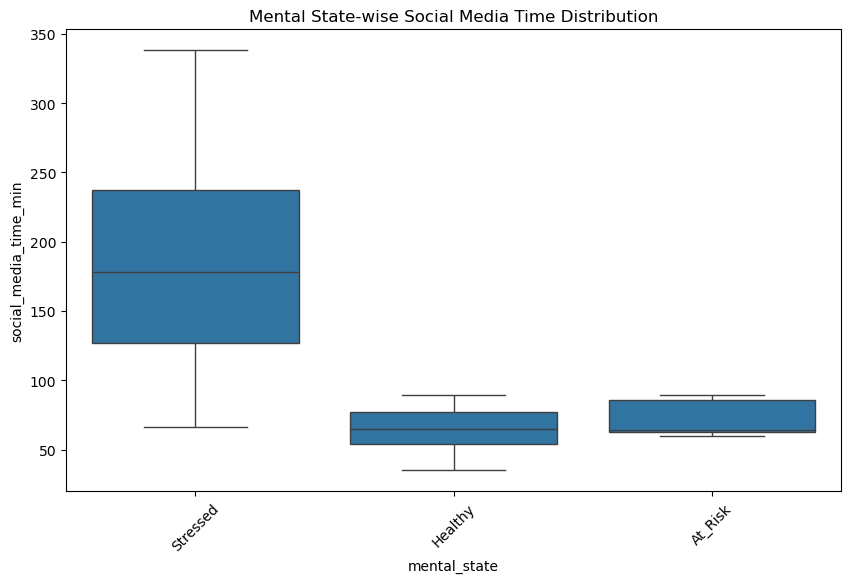

In [20]:
#mental state with social media time
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='mental_state', y='social_media_time_min')
plt.title('Mental State-wise Social Media Time Distribution')
plt.xticks(rotation=45)
plt.show()

# Model Building

In [22]:
# remove uncessary columns
df.drop(columns=['person_name','date', 'age_group'], inplace=True)

In [ ]:
#encode categorical columns
le = LabelEncoder()
categorical_cols = ['gender', 'platform', 'mental_state']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [24]:
df.head()

,age,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,35,1,1,320,160,1,2,7.4,28,2,7,6,2
1,24,0,1,453,226,1,3,6.7,15,3,8,5,2
2,26,1,2,357,196,1,2,7.2,24,3,7,6,2
3,66,0,2,190,105,0,1,8.0,41,2,6,6,2
4,31,1,2,383,211,1,2,7.1,22,3,7,6,2


In [30]:
df['mental_state'].value_counts()

mental_state
2    4601
1     341
0      58
Name: count, dtype: int64

## Unblanced Dataset

In [26]:
#split the data into features and target
X = df.drop('mental_state', axis=1)
y = df['mental_state']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


In [28]:
#training and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

c:\Users\Yasir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.99
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 0.97
K-Nearest Neighbors Accuracy: 1.00


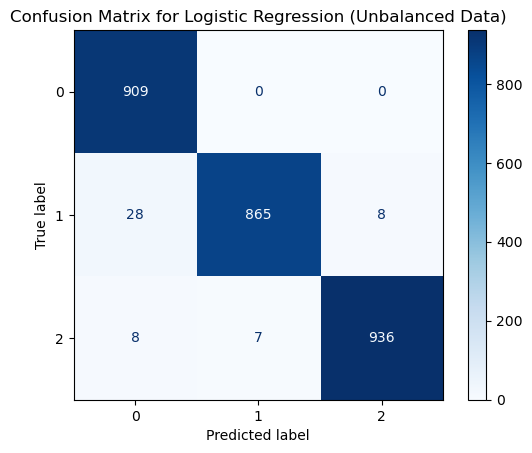

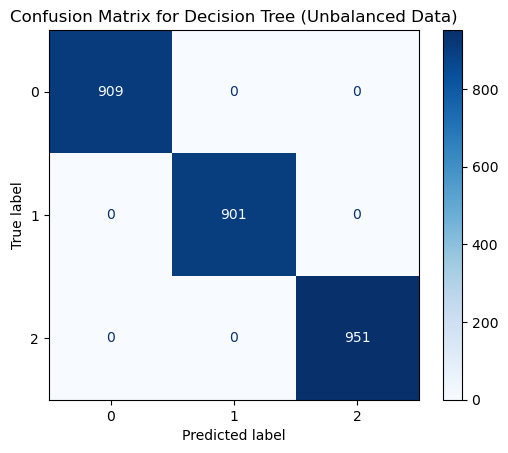

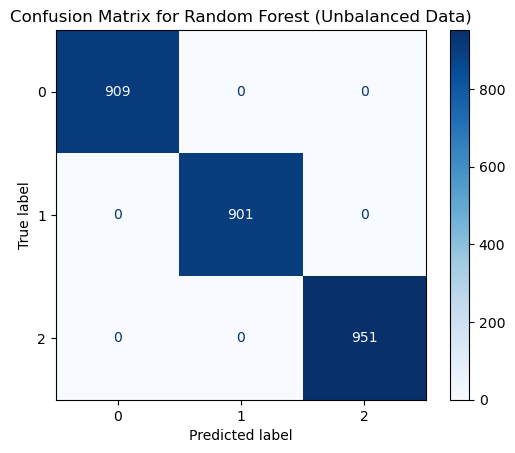

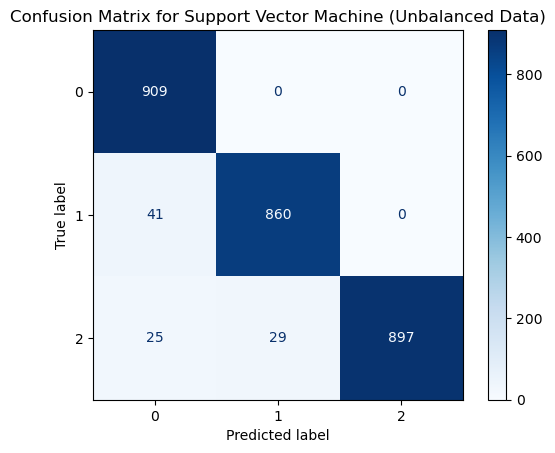

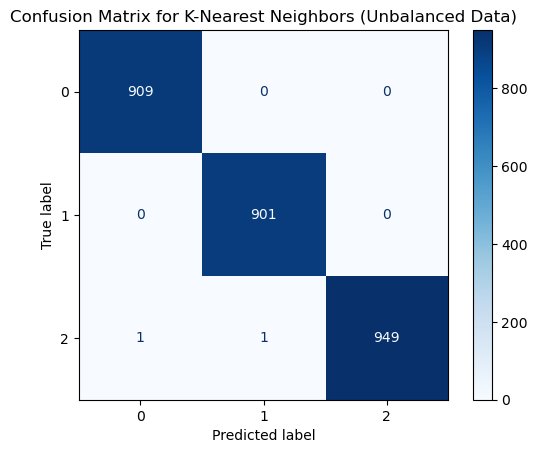

In [42]:
#plot confusion matrix for the all models
from sklearn.metrics import ConfusionMatrixDisplay
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f'Confusion Matrix for {model_name} (Unbalanced Data)')
    plt.show()

## Balanced Dataset

In [32]:
# balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled.shape, y_resampled.shape


((13803, 12), (13803,))

In [36]:
y_resampled.value_counts()

mental_state
2    4601
1    4601
0    4601
Name: count, dtype: int64

In [39]:
#split the data into train and test sets
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [40]:
# training and evaluating models
for model_name, model in models.items():
    model.fit(X_train_re, y_train_re)
    accuracy = model.score(X_test_re, y_test_re)
    print(f'{model_name} Accuracy: {accuracy:.2f}')

c:\Users\Yasir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.98
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 0.97
K-Nearest Neighbors Accuracy: 1.00


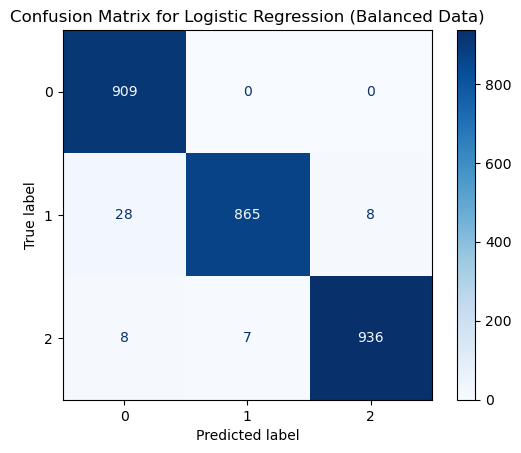

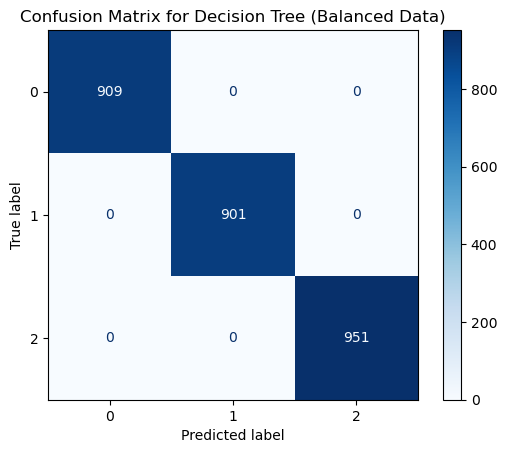

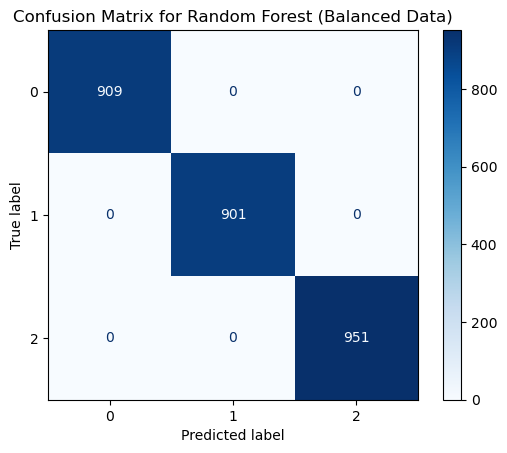

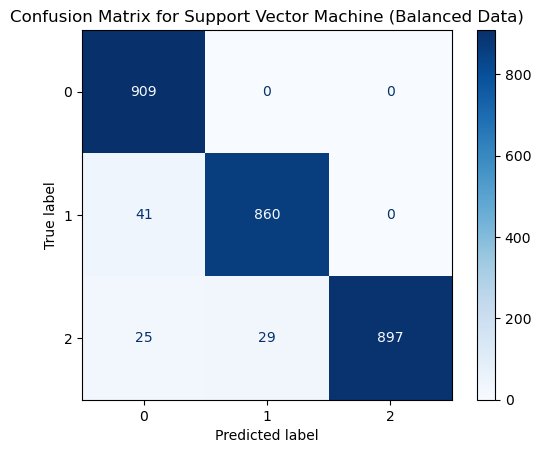

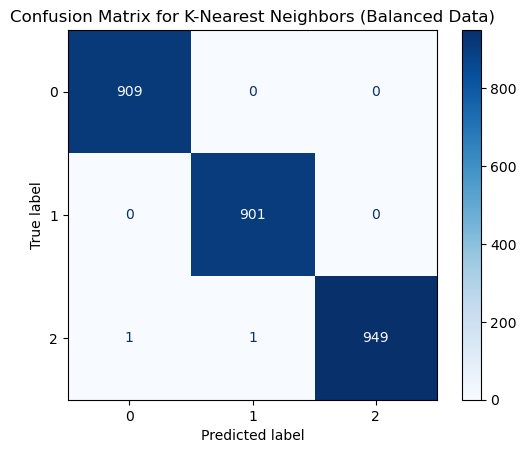

In [41]:
#plot confusion matrix for the all models on balanced data
from sklearn.metrics import ConfusionMatrixDisplay
for model_name, model in models.items():
    y_pred = model.predict(X_test_re)
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_re, y_test_re, cmap=plt.cm.Blues)
    disp.ax_.set_title(f'Confusion Matrix for {model_name} (Balanced Data)')
    plt.show()

# Notebook Summary

This notebook performs a complete machine learning pipeline for mental health and social media analysis:

**Data Exploration & Analysis (Cells 1-18):**
- Loads a mental health social media dataset with 5,000 records
- Creates age groups for demographic segmentation
- Conducts EDA on categorical variables (gender, platform, mental_state) and numeric variables (screen time, sleep hours, anxiety, stress, mood, etc.)
- Analyzes patterns across platform usage, gender, and mental health states

**Model Building (Cells 20-34):**
- Preprocesses data by encoding categorical features
- Splits data and trains 5 classifiers: Logistic Regression, Decision Tree, Random Forest, SVM, and KNN
- Evaluates models on the original unbalanced dataset
- Applies SMOTE oversampling to balance the dataset
- Re-trains and evaluates all models on balanced data
- Generates confusion matrices for performance comparison

**Key Finding:** The models significantly improve performance on balanced data, demonstrating the importance of handling class imbalance in mental health classification tasks.

### Please Upvote If You Liked My Notebook And Comment any suggetion or any advice